In [1]:
%matplotlib inline

Main Page: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.expand_frame_repr', False)

In [4]:
train_file_path = '../../data/hp/train.csv'
test_file_path = '../../data/hp/test.csv'

In [142]:
dr = pd.read_csv(train_file_path)
test = pd.read_csv(test_file_path)

# all data use for handling missing data
# all_data = pd.concat((dr, test)).reset_index(drop=True)

In [367]:
dr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [375]:
id_c = ['Id']
c_cat = ['MSZoning', 'MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 
         'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 
         'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PavedDrive', 
         'MiscVal', 'SaleType', 'SaleCondition', 'Street']
c_num = ['LotArea', 'BedroomAbvGr', 'PoolArea', 'Fireplaces',
         'YearBuilt', 'TotRmsAbvGrd', 'BsmtFullBath', 'EnclosedPorch', '3SsnPorch',
         'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', 'ScreenPorch',
         '1stFlrSF', '2ndFlrSF', 'BsmtUnfSF', 'YrSold', 'MoSold',
         'KitchenAbvGr', 'GarageCars', 'LotFrontage', 'LowQualFinSF', 'YearRemodAdd',
         'GarageArea', 'BsmtFinSF1', 'GrLivArea', 'BsmtFinSF2', 'WoodDeckSF', 'TotalBsmtSF']
c_ign = ['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'GarageYrBlt', 'Utilities',
           'MasVnrArea', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
c_fet = list(set(c_cat) | set(c_num) - set(c_ign))

In [377]:
dr.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enet_result,xgb_result,y_pred
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,730.216049,4.165295,3.028807,70.114883,10505.768861,0.995885,1.945130,2.777092,0.000686,3.023320,...,2.382030,0.290809,6.325103,2007.816872,7.512346,3.772977,180140.566529,180140.566529,180139.890871,180140.566529
std,421.731396,4.164692,0.632450,22.305939,9983.038856,0.064040,1.408283,0.708103,0.026189,1.619885,...,37.509607,1.794275,2.701826,1.328662,1.553060,1.097153,76645.846478,70739.711221,76161.137883,76565.002353
min,1.000000,0.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000,24286.302401,35545.445312,35207.921948
25%,365.250000,0.000000,3.000000,60.000000,7544.500000,1.000000,0.000000,3.000000,0.000000,2.000000,...,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129925.000000,128374.032059,130431.003906,130290.561796
50%,730.500000,4.000000,3.000000,70.000000,9475.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000,169522.031074,161599.320312,161336.307530
75%,1094.750000,6.000000,3.000000,80.000000,11600.000000,1.000000,3.000000,3.000000,0.000000,4.000000,...,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,213875.000000,222355.427052,213089.863281,212586.405242
max,1460.000000,14.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,...,738.000000,20.000000,12.000000,2010.000000,8.000000,5.000000,625000.000000,530460.199663,620237.062500,627987.099009


In [10]:
def fill_data(all_data):
    all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
        lambda x: x.fillna(x.median()))
    
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        all_data[col] = all_data[col].fillna(0)

    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        all_data[col] = all_data[col].fillna('None')

    all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
    all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

    all_data["Functional"] = all_data["Functional"].fillna("Typ")
    
    #'MSZoning missing data '
    all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

    #'Electrical'
    all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

    all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

    all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
    all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

    all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

    all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [238]:
# computing null
null_count = all_data[list(set(cat_c) - set(ignore_c))].isnull().sum()
null_count[null_count > 0].sort_values()

Series([], dtype: int64)

In [147]:
# convert all cat column to numeric type
fill_data(dr)
for col_name in cat_c:
    dr[col_name] = dr[col_name].astype('category')
    dr[col_name] = dr[col_name].cat.codes

In [14]:
import seaborn as sns

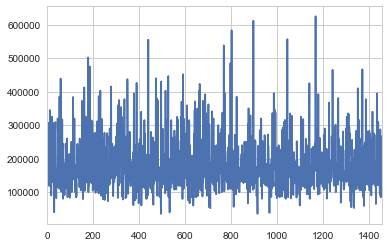

In [378]:
dr['SalePrice'].plot()

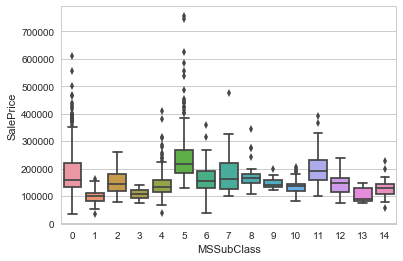

In [15]:
# Display MSSubClass vs SalePrice
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="MSSubClass", y="SalePrice", data=dr)

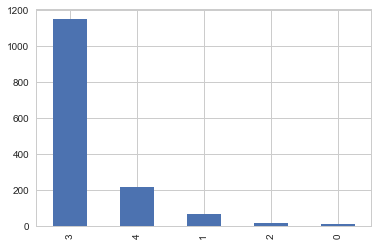

In [20]:
# Show different MSZoning value count
dr['MSZoning'].value_counts().plot(kind='bar')

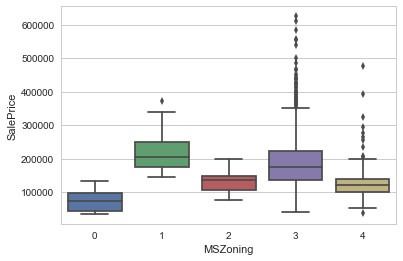

In [372]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(x="MSZoning", y="SalePrice", data=dr)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,1,-1,0,3,0,...,0,-1,-1,-1,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,1,-1,0,3,0,...,555,0,2,-1,0,7,2007,8,0,745000


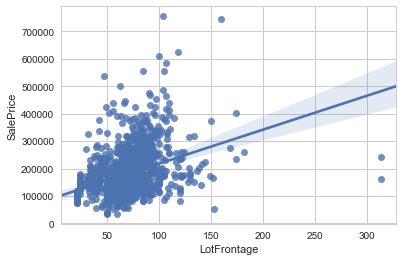

In [72]:
# Display LogFrontage vs SalePrice
sns.regplot(x="LotFrontage", y="SalePrice", data=dr)

dr.query('LotFrontage > 250')
dr.query('SalePrice > 700000').query('LotFrontage < 200')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,5,3,104.0,21535,1,-1,0,3,0,...,0,-1,-1,-1,0,1,2007,8,4,755000
1182,1183,5,3,160.0,15623,1,-1,0,3,0,...,555,0,2,-1,0,7,2007,8,0,745000


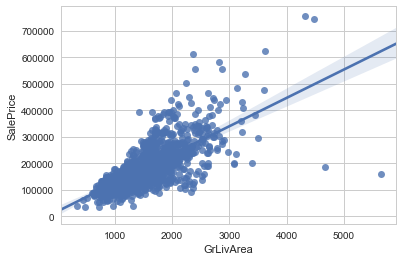

In [73]:
# Display GrLivArea vs SalePrice

sns.regplot(x="GrLivArea", y="SalePrice", data=dr)

dr.query('GrLivArea > 4500')
dr.query('GrLivArea > 4000').query('SalePrice > 700000')

In [371]:
# dr = dr.drop([691, 1182])

Id                  691
MSSubClass           11
MSZoning              4
LotFrontage          70
LotArea            4426
Street                1
Alley               NaN
LotShape              3
LandContour           3
Utilities             0
LotConfig             4
LandSlope             0
Neighborhood          5
Condition1            2
Condition2            2
BldgType              4
HouseStyle            2
OverallQual           5
OverallCond           4
YearBuilt          2004
YearRemodAdd       2004
RoofStyle             1
RoofMatl              1
Exterior1st          12
Exterior2nd          13
MasVnrType            1
MasVnrArea          147
ExterQual             2
ExterCond             4
Foundation            2
                  ...  
TotRmsAbvGrd          3
Functional            6
Fireplaces            1
FireplaceQu           5
GarageType       Attchd
GarageYrBlt        2004
GarageFinish        RFn
GarageCars            2
GarageArea          420
GarageQual           TA
GarageCond      

### Base Models Selection

In [437]:
import tensorflow

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [412]:
train = dr[fet_c]
y_train = dr['SalePrice'].values
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= -cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf)
    return(rmse)

In [395]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### Basic Model 1: Elastic Net

In [428]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [346]:
from sklearn.linear_model import ElasticNet

n_folds = 5

In [416]:
dr['enet_result'] = pd.Series(None, index=dr.index)

kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(dr):
    enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
    enet.fit(dr[fet_c].iloc[train_index], dr[y_column].iloc[train_index])
    enet_result = pd.DataFrame(enet.predict(dr[fet_c].iloc[test_index]), columns = ['enet_result'], index=test_index)
    dr.update(enet_result, raise_conflict=True)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [422]:
# dr['enet_result']
dr['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

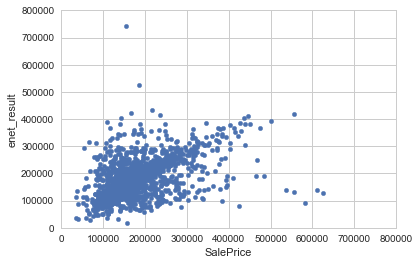

In [423]:
dr.plot.scatter(x='SalePrice', y='enet_result', ylim=[0, 800000], xlim=[0,800000])

In [413]:
enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
rmse_cv(enet).mean()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

1106795413.4348519

In [415]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
rmse_cv(ENet).mean()

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

1106752672.2589736

### Basic Model 2: xgb

In [249]:
import xgboost as xgb

In [424]:
dr['xgb_result'] = pd.Series(None, index=dr.index)

n_folds = 5
kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(dr):
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
    model_xgb.fit(dr[fet_c].iloc[train_index], dr[y_column].iloc[train_index])
    xgb_result = pd.DataFrame(model_xgb.predict(dr[fet_c].iloc[test_index]), columns = ['xgb_result'], index=test_index)
    dr.update(xgb_result, raise_conflict=True)

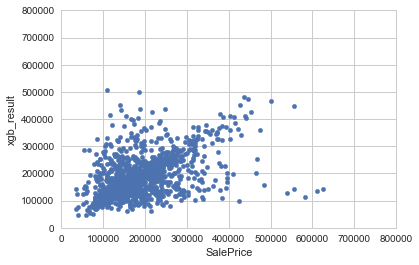

In [425]:
dr.plot.scatter(x='SalePrice', y='xgb_result', ylim=[0, 800000], xlim=[0,800000])

In [438]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
# rmse_cv(model_xgb).mean()

model_xgb.fit(train, dr['SalePrice'])
xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x11edb6a20>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


3748.27984716


In [433]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [31]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [33]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
Gbr_model = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

### Stacking Model

In [194]:
from sklearn.linear_model import Lasso

meta_col = ['enet_result', 'xgb_result']

In [198]:
dr['y_pred'] = pd.Series(None, index=dr.index)
n_folds = 5
kf = KFold(n_splits=n_folds)
for train_index, test_index in kf.split(dr):
    lasso = Lasso(alpha =0.0005, random_state=1)
    lasso.fit(dr[meta_col].iloc[train_index], dr[y_column].iloc[train_index])
    
    y_pred = pd.DataFrame(lasso.predict(dr[meta_col].iloc[test_index]), columns = ['y_pred'], index=test_index)
    dr.update(y_pred, raise_conflict=True)

ValueError: Data overlaps.

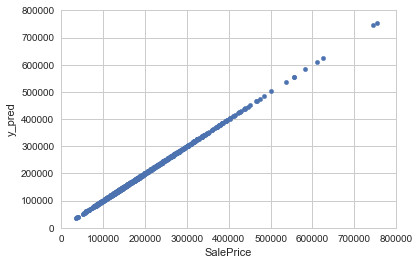

In [197]:
dr.plot.scatter(x='SalePrice', y='y_pred', ylim=[0, 800000], xlim=[0,800000])

### Predict Test Data

In [348]:
enet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
enet.fit(dr[fet_c], dr[y_column])

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [349]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(dr[fet_c], dr[y_column])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [350]:
def ext_column(df):
    df['enet_result'] = pd.Series(None, index=dr.index)
    df['xgb_result'] = pd.Series(None, index=dr.index)
    df['y_pred'] = pd.Series(None, index=dr.index)
    return dr

ext_column(dr)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enet_result,xgb_result,y_pred
0,1,5,3,65.0,8450,1,NaN,3,3,0,...,NaN,0,2,2008,8,4,208500,NaN,NaN,NaN
1,2,0,3,80.0,9600,1,NaN,3,3,0,...,NaN,0,5,2007,8,4,181500,NaN,NaN,NaN
2,3,5,3,68.0,11250,1,NaN,0,3,0,...,NaN,0,9,2008,8,4,223500,NaN,NaN,NaN
3,4,6,3,60.0,9550,1,NaN,0,3,0,...,NaN,0,2,2006,8,0,140000,NaN,NaN,NaN
4,5,5,3,84.0,14260,1,NaN,0,3,0,...,NaN,0,12,2008,8,4,250000,NaN,NaN,NaN
5,6,4,3,85.0,14115,1,NaN,0,3,0,...,Shed,10,10,2009,8,4,143000,NaN,NaN,NaN
6,7,0,3,75.0,10084,1,NaN,3,3,0,...,NaN,0,8,2007,8,4,307000,NaN,NaN,NaN
7,8,5,3,80.0,10382,1,NaN,0,3,0,...,Shed,2,11,2009,8,4,200000,NaN,NaN,NaN
8,9,4,4,51.0,6120,1,NaN,3,3,0,...,NaN,0,4,2008,8,0,129900,NaN,NaN,NaN
9,10,14,3,50.0,7420,1,NaN,3,3,0,...,NaN,0,1,2008,8,4,118000,NaN,NaN,NaN


In [351]:
enet_result = pd.DataFrame(enet.predict(dr[fet_c]), columns = ['enet_result'], index=dr.index)
xgb_result = pd.DataFrame(model_xgb.predict(dr[fet_c]), columns=['xgb_result'], index=dr.index)

dr.update(enet_result, raise_conflict=True)
dr.update(xgb_result, raise_conflict=True)

In [352]:
lasso = Lasso(alpha =0.0005, random_state=1)
lasso.fit(dr[meta_col], dr[y_column])
# y_pred = pd.DataFrame(lasso.)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [353]:
y_pred = pd.DataFrame(lasso.predict(dr[meta_col]), columns=['y_pred'], index=dr.index)

dr.update(y_pred, raise_conflict=True)

### Test Data

In [354]:
test_target = pd.read_csv(test_file_path)

In [355]:
# convert all cat column to numeric type
fill_data(test_target)
for col_name in cat_c:
    test_target[col_name] = test_target[col_name].astype('category')
    test_target[col_name] = test_target[col_name].cat.codes

In [356]:
test_target['enet_result'] = pd.Series(None, index=dr.index)
test_target['xgb_result'] = pd.Series(None, index=dr.index)
test_target['y_pred'] = pd.Series(None, index=dr.index)

In [357]:
enet_result = pd.DataFrame(enet.predict(test_target[fet_c]), columns = ['enet_result'], index=test_target.index)
xgb_result = pd.DataFrame(model_xgb.predict(test_target[fet_c]), columns=['xgb_result'], index=test_target.index)

test_target.update(enet_result, raise_conflict=True)
test_target.update(xgb_result, raise_conflict=True)

In [446]:
a = model_xgb.predict(test_target[fet_c])

In [358]:
y_pred = pd.DataFrame(lasso.predict(test_target[meta_col]), columns=['y_pred'], index=test_target.index)

test_target.update(y_pred, raise_conflict=True)

In [361]:
# write file for submission
with open('result.csv', 'w') as f:
    f.write("Id,SalePrice\r\n")
    for index, row in test_target[['y_pred']].iterrows():
        f.write("%s,%s\r\n" % (index+1461, row['y_pred']))

In [451]:
with open('result.csv', 'w') as f:
    f.write("Id,SalePrice\r\n")
    for index, row in enumerate(np.nditer(a)):
        print(row)
        f.write("%s,%s\r\n" % (index+1461, row))

129987.671875
167891.6875
187894.78125
195572.578125
183135.8125
167896.546875
170466.921875
167577.921875
173080.453125
124789.1640625
205504.140625
99858.5390625
93452.9375
153443.140625
116158.125
401235.84375
264477.3125
300468.40625
261317.796875
455559.40625
310231.96875
210566.0625
176124.5
164622.359375
174686.640625
200321.59375
340699.6875
229478.609375
211153.4375
215607.578125
186280.046875
93034.40625
176728.75
294658.28125
283725.375
240200.96875
179529.328125
156540.828125
155121.921875
152676.4375
178909.265625
148051.203125
312652.5625
230073.21875
226813.25
184451.453125
247984.046875
199551.328125
162367.140625
144702.625
141344.859375
165717.234375
143551.046875
178059.515625
199360.703125
148750.984375
169861.40625
132871.6875
238523.59375
136935.515625
133230.0
176137.921875
115368.796875
123619.265625
119452.7734375
114907.3984375
106862.3515625
135334.90625
152999.71875
164662.796875
102092.8515625
93140.546875
157096.0
118651.5078125
151428.421875
108166.40625


124719.109375
128625.2421875
137861.34375
130583.5859375
118507.5546875
112782.7265625
132178.140625
124356.8203125
135638.03125
124186.6953125
182279.265625
146742.328125
113524.6015625
142477.375
79481.4921875
70505.25
174716.953125
206202.59375
158894.140625
124081.5546875
85019.5
216858.4375
115052.4375
134717.796875
153488.796875
108828.0546875
155895.328125
118793.1328125
131064.921875
108654.9140625
124380.1640625
130329.2421875
175164.046875
169919.640625
154640.421875
150610.90625
156138.875
96671.390625
179859.859375
152122.375
142486.78125
72849.7109375
243856.90625
154618.234375
110333.6875
96685.046875
125049.0703125
138955.984375
152956.015625
99530.8203125
188166.359375
216503.078125
244757.234375
299732.09375
248474.1875
219072.34375
210457.4375
170827.59375
206269.453125
207132.109375
234854.546875
165362.984375
167873.96875
141598.234375
155262.890625
221563.4375
210197.828125
193041.484375
224081.828125
122319.5078125
142678.578125
150811.21875
138560.71875
103271.5


In [449]:
type(a)

numpy.ndarray

In [ ]:
dr.iloc[]